# 8.1. Mô hình cây quyết định (_decision tree_)

Mô hình _cây quyết định_ là một mô hình được sử dụng khá phổ biến và hiệu quả trong cả hai lớp bài toán phân loại và dự báo của học có giám sát. Khác với những thuật toán khác trong học có giám sát, mô hình _cây quyết định_ không tồn tại phương trình dự báo. Mọi việc chúng ta cần thực hiện đó là tìm ra một cây quyết định dự báo tốt trên tập huấn luyện và sử dụng cây quyết định này dự báo trên tập kiểm tra.

Vậy một cây quyết định sẽ được xây dựng như thế nào? Điều gì ẩn chứa sau thuật toán cây quyết định? Để trả lời cho câu hỏi này, chúng ta cùng lấy ví dụ về áp dụng mô hình cây quyết định cho bài toán phân loại giá nhà trên bộ dữ liệu boston.

# 8.2. Bài toán phân loại cây quyết định trên bộ dữ liệu boston

Bộ dữ liệu được sử dụng cho bài toán này là bộ dữ liệu về giá nhà ở ở boston bao gồm 13 quan sát và 506 biến.

Đọc dữ liệu:

In [1]:
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()
X = boston.data
y = boston.target
y = [1 if price > 20 else 0 for price in y] # 1 nhà giá cao, 0 nhà giá thấp
y = np.array(y)

print('Input features: ', ', '.join(boston.feature_names))
print(X.shape)

Input features:  CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT
(506, 13)


Ý nghĩa của những trường dữ liệu:

Các biến đầu vào:

* crim: Tỷ lệ phạm tội phạm bình quân đầu người theo thị trấn.
* zn: Tỷ lệ đất ở được quy hoạch cho các lô trên 25.000 foot square.
* indus: Tỷ lệ diện tích thuộc lĩnh vực kinh doanh phi bán lẻ trên mỗi thị trấn.
* chas: Biến giả, = 1 nếu được bao bởi sông Charles River, = 0 nếu ngược lại.
* nox: Nồng độ khí Ni-tơ oxit.
* rm: Trung bình số phòng trên một căn hộ.
* age: Tỷ lệ căn hộ được xây dựng trước năm 1940.
* dis: Khoảng cách trung bình có trọng số tới 5 trung tâm việc làm lớn nhất ở Boston.
* rad: Chỉ số về khả năng tiếp cận đường cao tốc.
* tax: Giá trị thuế suất tính trên đơn vị 10000$.
* ptratio: Tỷ lệ học sinh-giáo viên trên mỗi thị trấn.
* black: Tỷ lệ số người da đen trong thị trấn được tính theo công thức: 1000(Bk−0.63)2 ở đây Bk là tỷ lệ người da đen trong thị trấn.
* lstat: Tỷ lệ phần trăm dân số thu nhập thấp.

Biến mục tiêu: Căn cứ vào giá nhà ở > 20 nghìn USD hoặc nhỏ hơn mà chúng ta phân thành nhãn 1 (giá cao) và nhãn 0 (giá thấp).

Tiếp theo ta sẽ xây dựng một mô hình phân loại dự trên cây quyết định với độ sâu tối đa là 3. Độ sâu ở đây chính là số lượng tối đa các câu hỏi khi đi từ _node gốc_ tới _node lá_. Chúng ta khai báo độ sâu thông qua đối số _max_depth_.

In [2]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

Tiếp theo là sử dụng hàm `export_graphviz()` để biểu đồ hoá cây quyết định. Trong hàm này chúng ta chỉ cần truyền vào mô hình, tên các đặc trưng đầu vào thông qua đối số `feature_names` và các nhãn thông qua đối số `class_names`.

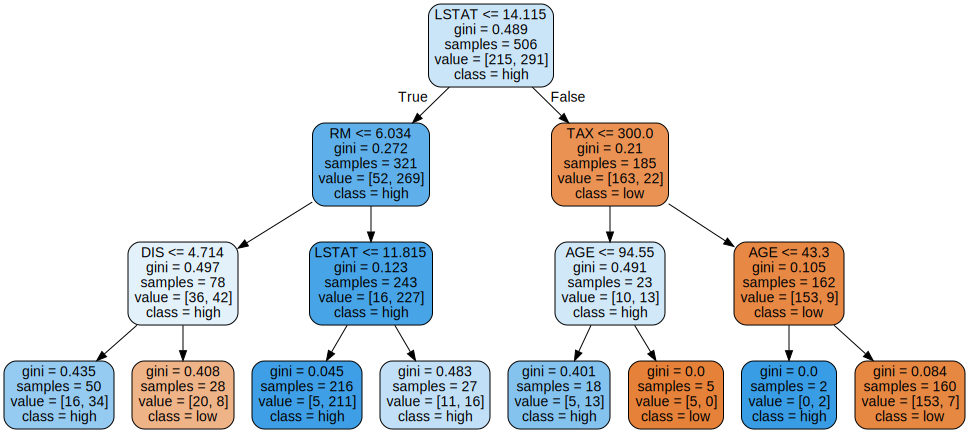

In [3]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=boston.feature_names,  
                                class_names=['low', 'high'],
                                rounded=True,
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

**Cách dự báo từ cây quyết định?**

Từ cây quyết định ở trên, dựa trên việc rẽ nhánh, chúng ta suy ra được nhãn dự báo cho các quan sát. Giả sử quan sát đầu vào có giá trị: `LSTAT = 10, RM = 6, DIS = 3`. Khi đó xuất phát từ _node gốc_ ta tuần tự đặt và trả lời các câu hỏi:

* LSTAT <= 14.115 là đúng, như vậy tại _node gốc_ ta rẽ sang nhánh True bên trái.
* Tiếp theo ta lại xét tiếp câu hỏi RM <= 6.034, kết quả trả về là True. Do đó ta lại rẽ sang nhánh bên trái.
* Tiếp theo xét tiếp câu hỏi DIS <= 4.714, kết quả trả về tiếp tục là True. Do đó ta rẽ sang bên trái và thu được kết quả dự báo ở _node lá_ là nhãn high.

Để minh chứng cho nhận định trên, ta sẽ thử nghiệm dự báo cho 5 quan sát sao cho giá trị `LSTAT = 10, RM = 6, DIS = 3` là cố định và những giá trị khác thay đổi ngẫu nhiên và kiểm tra kết quả dự báo.

In [4]:
import pandas as pd

# LSTAT = 10, RM = 6, DIS = 3, các giá trị khác có thể thay đổi tuỳ ý

for i in range(5):
  CRIM = np.random.randint(0, 100)
  INDUS = np.random.randint(0, 100)
  ZN = np.random.randint(0, 100)
  CHAS = np.random.randint(0, 100)
  NOX = np.random.randint(0, 100)
  AGE = np.random.randint(0, 100)
  RAD = np.random.randint(0, 100)
  TAX = np.random.randint(0, 100)
  PTRATIO = np.random.randint(0, 100)
  B = np.random.randint(0, 100)

  x = pd.DataFrame({'CRIM':CRIM, 'ZN':ZN, 'INDUS':INDUS, 'CHAS':CHAS, 'NOX':NOX, 'RM':[6], 'AGE':AGE, 'DIS':[3], 'RAD':RAD, 'TAX':TAX, 'PTRATIO':PTRATIO, 'B':B, 'LSTAT':[10]})
  y_pred = tree_clf.predict_proba(x)[0]
  print('probability low {}, high {}'.format(y_pred[0], y_pred[1]))
  print('predicted label {}'.format(tree_clf.predict(x)[0]))

probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1


Chúng ta thấy dù có thay đổi các giá trị khác như thế nào, miễn là 3 giá trị `LSTAT = 10, RM = 6, DIS = 3` thoả mãn thì chúng ta đều thu được dự báo có nhãn là 1. Điều này cho thấy dự báo từ cây nhị phân đã tuân theo qui luật rẽ nhánh in đậm như bên dưới:


![](https://imgur.com/V8Gyi63.png)

# 8.3. Đường biên phân chia của cây quyết định

Đường biên phân chia của cây quyết định sẽ dựa trên kịch bản rẽ nhánh mà chúng ta lựa chọn. Gỉa định chúng ta đi từ node `(LSTAT <= 14.115) --> (RM <= 6.034) --> (DIS <= 4.714)`. Khi đó đường biên phân chia là những đường thẳng trong hình bên dưới đi qua ngưỡng threshold.

![](https://i.imgur.com/8qAE60t.jpeg)

* Bước 1: Đường thẳng $x = 14.115$ sẽ phân mặt phẳng thành 2 phần là $x \leq 14.115$ và $x > 14.115$. Theo phương án rẽ nhánh tại _node gốc_ tương ứng với biến `LSTAT`, chúng ta lựa chọn nửa mặt phẳng $x \leq 14.115$ nằm bên trái để dự báo nhãn.

* Bước 2: Đối với nửa mặt phẳng $x \leq 14.115$ chúng ta lại xét tiếp trục y tương ứng với biến `RM`. Đường thẳng $y = 6.034$ sẽ tiếp tục chia nửa mặt phẳng này thành hai phần là $y > 6.034$ và $y \leq 6.034$. Theo kịch bản chúng ta sẽ lựa chọn hình chữ nhật bị giới hạn bởi $x \geq 14.115$ và $y \geq 6.034$. Lúc này cây quyết định vẫn chưa kết thúc. Do mô hình có độ sâu là 3 nên chúng ta phải tiếp tục phân chia tiếp theo threshold của biến `DIS`.

* Đường thẳng $x = 4.714$ sẽ tiếp tục phân chia hình chữ nhật thu được ở bước 2 thành hai hình chữ nhật con. Ta chỉ lấy hình chữ nhật nằm bên trái. Đó chính là hình chữ nhật bị giới hạn bởi các cạnh in đậm.
 
Chúng ta để ý thấy rằng mọi điểm nằm trong hình chữ nhật có các cạnh in đậm sẽ cùng được dự báo thuộc về nhóm `high` hình tròn như hình vẽ. Các cạnh in đậm của hình chữ nhật chính là đường biên phân chia của cây quyết định. Đối với những điểm nằm ngoài hình chữ nhật này thì có thể lẫn cả nhãn `high` và nhãn `low` và chúng ta cần những kịch bản rẽ nhánh khác để dự báo nhãn cho chúng.

Như vậy đường biên phân chia của cây quyết định là khá đơn giản và trực quan. Chúng ta không cần giải bài toán tối ưu như SVM hay Logistic để tìm ra được đường biên phân chia này mà đơn thuần chúng chỉ là một siêu phẳng đi qua một ngưỡng threshold cố định. Những mô hình có đường biên phân chia có thể giải thích được như vậy được gọi là _white box models_. Trái lại, trong machine learning tồn tại những mô hình mà chúng ta không thể giải thích được vì sao mô hình lại đưa ra quyết định như vậy. Chẳng hạn như trong mạng nơ ron, mô hình có thể dễ dàng dự báo một bức ảnh là chó hay mèo nhưng ta không thể nói được vì sao mô hình lại dự báo đó là chó hoặc mèo. Kết quả dự báo căn cứ vào bao nhiêu phần trăm quyết định được đưa ra dựa trên các đặc trưng như lông, đuôi, mắt, mũi, miệng của chúng? Những mô hình như vậy được gọi là _black box models_.

# 8.4. Cách khởi tạo cây quyết định

Để trả lời cho câu hỏi một cây quyết định được tạo ra như thế nào? Chúng ta cần biết được **thứ tự câu hỏi** là gì và **cách đặt câu hỏi** như thế nào? 


**Thứ tự lựa chọn câu hỏi**

Đối với những bộ dữ liệu có số lượng biến đầu vào $d$ lớn, việc lựa chọn biến nào sẽ được đặt ở _node gốc_ là điều không dễ dàng. Một kịch bản lựa chọn ngẫu nhiên chỉ có xác suất đúng là $\frac{1}{d}$ và dường như khả năng chúng ta chọn sai là rất cao. Do đó chúng ta cần phải có một tiêu chí nào đó để lựa chọn biến phù hợp. Xuất phát từ yêu cầu này, chúng ta hình thành nên các độ đo như _entropy, Gini_ đo lường mức độ tinh khiến (_purity_) và vẩn đục (_impurity_) của một biến mà ta sẽ tìm hiểu bên dưới.

## 8.4.1. Tinh khiết và vẩn đục

Giả định chúng ta đang xây dựng một cây quyết định mà tại một _node quyết định_ chúng ta có 50 quan sát rơi vào chúng. Có ba phương án lựa chọn node lá tiếp theo tương ứng với 3 biến, chúng có kết quả thống kê tại _node lá_ lần lượt là:

* Biến 1: 25 nhãn 1, 25 nhãn 0.
* Biến 2: 20 nhãn 1, 30 nhãn 0.
* Biến 3: 0 nhãn 1, 50 nhãn 0.

Theo bạn đâu sẽ là biến phù hợp nhất được lựa chọn tại node lá?

Kịch bản lựa chọn biến 1 dường như là vô nghĩa vì nó tương đương với dự báo ngẫu nhiên nhãn 0 và 1.

Kịch bản tương ứng với biến 2 có xu hướng dự báo thiên về nhãn 0 nhưng tỷ lệ dự báo sai nhãn 1 vẫn còn cao.

Lựa chọn biến 3 là tuyệt vời vì chúng ta đã dự báo đúng hoàn toàn nhãn 0. 

Như vậy mục tiêu của chúng ta khi đối diện với việc phân loại đó là kết quả trả về tại _node lá_ chỉ thuộc về một lớp. Chúng ta sử dụng một thuật ngữ ngắn gọn để gọi tên trường hợp này là _tinh khiết_ (_purity_). Trái ngược lại với _tinh khiết_ sẽ là khái niệm _vấn đục_ (_impurity_), tức phân phối của các nhãn tại node lá còn khá mập mờ, không có xu hướng thiên về một nhãn nào cụ thể. Nếu ra quyết định phân loại dựa trên kịch bản dẫn tới node lá sẽ trả về kết quả không đáng tin cậy.

## 8.4.2. Thước đo cho mức độ _tinh khiết_ (_purity_)

_Entropy_ là một khái niệm khoa học được sử dụng lần đầu tiên trong nhiệt động lực học và sau đó được phổ biến trong các lĩnh vực khác như vật lý, hoá học, y sinh, lý thuyết thông tin,.... Trong nhiệt động lực học thì Entropy là một đặc tính vật lý có thể đo lường được có sự liên kết với trạng thái hỗn loạn (_disorder_) hoặc không chắc chắn (_uncertainty_).

Trong thuật toán _cây quyết định_ chúng ta sẽ sử dụng _Entropy_ để đánh giá mức độ _tinh khiết_ của phân phối xác suất của một sự kiện.

Giả sử một sự kiện xảy ra với phân phối xác suất là $\mathbf{p} = (p_1, p_2, \dots, p_C)$ thoả mãn $\sum_{i=1}^{C} p_i = 1$. Khi đó hàm _entropy_ đối với sự kiện trên là:

$$\mathbf{H}(\mathbf{p}) = -\sum_{i=1}^{C}p_i \log p_i  \tag{1}$$

Trong trường hợp $p_i = 0$ thì hàm _entropy_ là không xác định do $\log p_i$ không tồn tại, tuy nhiên căn cứ vào giá trị hội tụ thì chúng ta sẽ qui ước giá trị của _entropy_ trong trường hợp này là 0.

Trong lý thuyết thông tin thì hàm $\log$ ở phương trình $(1)$ là hàm logarith với cơ số 2. Tuy nhiên ở đây chúng ta có thể sử dụng hàm logarith cơ số tự nhiên $e$ mà không thay đổi bản chất do giá trị đạt được tương đương với việc nhân với một hằng số.

Khảo sát hàm _entropy_ chúng ta sẽ nhận thấy đây là một hàm không âm có giá trị tối đa đạt được khi phân phối xác suất là đồng đều trên toàn bộ các nhãn. Để đơn giản bên dưới chúng ta vẽ đồ thị và khảo sát hàm _entropy_ đối với bài toán phân loại nhị phân.

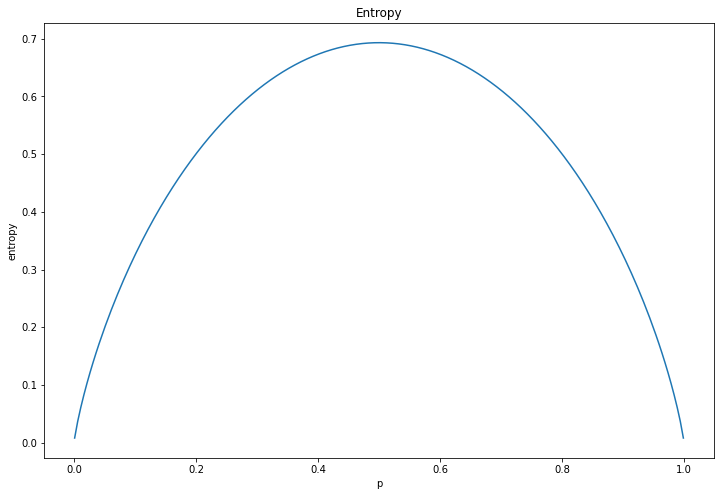

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Tính entropy theo p
def _entropy(p):
  return -(p*np.log(p)+(1-p)*np.log((1-p)))

# Khởi tạo gía trị yhat từ 0 đến 1
p = np.linspace(0.001, 0.999, 200)

# Hàm visualize cross entropy
def _plot_crs(p):
  entropy = _entropy(p)
  plt.figure(figsize = (12, 8))
  plt.plot(p, entropy)
  plt.xlabel('p')
  plt.ylabel('entropy')
  plt.title('Entropy')
  plt.show()

_plot_crs(p)

Giá trị lớn nhất đạt được khi $p_0 = p_1 = \frac{1}{2}$. Trong khi giá trị nhỏ nhất đạt được khi một trong hai xác suất bằng 1 và xác suất còn lại bằng 0.

**Bên dưới là lời giải cho bài toán cực trị entropy cho bạn nào thực sự quan tâm**

Ta dễ dàng tìm được cực trị $\mathbf{H}(\mathbf{p})$. Thật vậy, vì $1 \geq p_i \geq 0$ nên giá trị $\mathbf{H}(\mathbf{p}) \geq 0$ là hiển nhiên. Đẳng thức xảy ra khi tồn tại một giá trị $p_i = 1$ và các giá trị còn lại bằng 0.

Để tìm cực đại chúng ta xét hàm $f(x) = -x\log{x}$. Hàm này có đạo hàm bậc 2 là $f''(x) = \frac{-1}{x} \leq 0$ nên là một hàm lõm trên khoảng $(0, 1]$. Áp dụng bất đẳng thức Jensen ta có:

$$
\mathbf{H}(\mathbf{p}) = \sum_{i=1}^C f(p_1) \geq  C f(\frac{\sum_{i=1}^C p_i}{C}) = Cf(\frac{1}{C}) = -\log C
$$

Đẳng thức xảy ra khi $p_0=p_1= \dots =p_C=\frac{1}{C}$.

Kết luận giá trị _entropy_ cực tiểu đạt được khi phân phối $\mathbf{p}$ là tinh khiết nhất, tức phân phối hoàn toàn thuộc về một nhóm. Trái lại, _entropy_ cực đại đạt được khi toàn bộ xác suất thuộc về các nhóm là bằng nhau. Một phân phối có _entropy_ càng cao thì mức độ tinh khiết của phân phối đó sẽ càng thấp và ngược lại.

Như vậy về bản chất thì _entropy_ là một thước đo về độ tinh khiết của phân phối xác suất. Dựa trên _entropy_ chúng ta có thể đánh giá tính hiệu quả của câu hỏi ở mỗi node và quyết định xem đâu là câu hỏi hiệu quả hơn (có độ tinh khiết lớn hơn, _entropy_ nhỏ hơn). Tiếp theo chúng ta sẽ cùng tìm hiểu giải thuật tìm kiếm _tham lam_ (_greedy_) theo chiều từ trên xuống để xây dựng nên cây quyết định dựa trên hàm _entropy_.

## 8.4.3. Tìm kiếm tham lam và truy hồi

Giả sử số lượng biến của bạn là $n$ rất lớn. Bạn muốn tạo ra một cây nhị phân với độ sâu tối đa là $d$. Số khả năng lựa chọn $d$ biến (có xét đến tính thứ tự) từ $m$ biến để tạo thành một cây nhị phân là chỉnh hợp $A_n^d = \frac{d!}{(d-n)!}$. Khi $n$ và $d$ lớn thì đây là một con số rất lớn. Do đó rất khó để chúng ta tìm được đúng cây nhị phân tối ưu ngay chỉ trong một lần. Thay vào đó, một chiến lược hợp lý và khôn ngoan hơn là đi từng bước nhỏ và tìm cách lựa chọn câu hỏi tối ưu ở mỗi node. Chiến lược như vậy được gọi là _tìm kiếm tham lam_.

Ngoài ra quá trình lựa chọn này sẽ tiếp diễn một cách truy hồi (_recursive_) theo chiều từ trên xuống dưới cho đến khi đạt ngưỡng về độ sâu hoặc node cuối cùng hoàn toàn thuộc về một nhóm. Ở một số thuật toán, để hạn chế hiện tượng _quá khớp_ chúng ta có thể dừng phân chia nếu chạm ngưỡng số lượng quan sát tối thiểu ở node lá hoặc giới hạn về độ sâu của nhánh (chúng ta sẽ làm rõ hơn điều này ở phần bên dưới).

Cách xây dựng cây quyết định theo phương pháp tìm kiếm tham lam và truy hồi dựa trên thuật toán ID3 mà ta sẽ tìm hiểu bên dưới.

# 8.5. Thuật toán ID3 và CART

Thuật toán ID3 (viết tắt của _Iterative Dichotomiser 3_) là một giải thuật khá lâu đời được tạo ra bởi `Ross Quinlan` nhằm xây dựng cây quyết định phù hợp từ một bộ dữ liệu. Đây là giải thuật tiền đề mà dựa trên cơ sở đó, rất nhiều những giải thuật khác liên quan tới cây quyết định được kế thừa và phá triển:

* C4.5: Kế thừa của thuật toán ID3. Giải thuật này được sử dụng phổ biến trong machine learning và xử lý ngôn ngữ tự nhiên.
* CART: Viết tắt của cụm từ _Classification And Regression Tree_. Ưu điểm của nó là có thể sử dụng cho cả bài toán phân loại và hồi qui.
* CHAID: Sử dụng phân phối $\chi^2$ để tự động tương tác phát hiện phân chia  khi tính toán cây phân loại.
* MARS: Áp dụng hồi qui đa biến theo splines. Đây là một phương pháp hồi qui chia để trị, có thể loại bỏ ảnh hưởng của outliers.

Trong khuôn khổ bài viết này chúng ta sẽ tìm hiểu về thuật toán CART. Đây là thuật toán được sử dụng phổ biến nhất trong machine learning và có thể được sử dụng trong cả hai bài toán phân loại và hồi qui.

## 8.5.1. Trường hợp cây nhị phân với biến liên tục

Giả định chúng ta đang đứng ở node lá bất kỳ, các quan sát tại node này là tập $\mathcal{S}$ có kích thước $|\mathcal{S}|=N$. Tại node lá này thì mức độ tinh khiết được đánh giá thông qua hàm _entropy_ được tính theo công thức:

$$\mathbf{H}(\mathcal{S}) = - \sum_{i=1}^C p_i \log(p_i)$$

Trong đó $p_i$ là tỷ lệ phần trăm các quán sát thuộc về nhãn $i$. Lưu ý nhãn dự báo tại node lá trùng với nhãn mà có tỷ lệ lớn nhất.

Trong thuật toán CART, _hàm mất mát_ được định nghĩa là tổng có trọng số của _entropy_ trên toàn bộ các _node lá_. Trọng số ở đây được lấy theo tỷ lệ phần trăm quan sát trên từng _node lá_. Điều đó có nghĩa rằng với những _node lá_ có số lượng quan sát lớn thì ảnh hưởng của nó lên hàm mất mát là lớn hơn so với những _node lá_ có số lượng quan sát nhỏ. Nhận định này là hợp lý vì việc phân loại sai những node lá lớn gây hậu quả nghiêm trọng hơn so với phân loại sai node nhỏ. Để tối thiểu hoá _hàm mất mát_ thì chúng ta phải lựa chọn biến và ngưỡng sao cho tổng giá trị của _hàm mất mát_ là nhỏ nhất.

Tại note hiện tại, một câu hỏi đặt ra là liệu tiếp tục phân chia thì có tốt hơn không? Tốt hơn được thể hiện thông qua giá trị entropy phải giảm nhiều nhất. Nếu tốt hơn thì chúng ta phải lựa chọn biến nào tiếp theo? nếu là biến liên tục thì lựa chọn ngưỡng phân chia như thế nào? 

Lưu ý trong thuật toán ID3 thì chúng ta chỉ áp dụng trên các biến phân loại (_category_). Thuật toán CART cho phép ta tuning threshold để biến đổi biến liên tục sang các đặc trưng (_features_). Chẳng hạn biến được lựa chọn là $x^{(j)}$ có ngưỡng phân chia là $t$ thì hai _đặc trưng_ tương ứng là $x^{(j)} > t$ và $x^{(j)} \leq t$. Ngưỡng $t$ giúp phân loại tập $\mathcal{S}$ thành hai tập con tương ứng là:

$$
\begin{split}
\left\{
\begin{matrix}
\mathcal{S}_0 = \{ \mathbf{x}_i | x_{i}^{(j)} \leq t, \mathbf{x}_i \in \mathcal{S} \} \\
\mathcal{S}_1 = \{ \mathbf{x}_i | x_{i}^{(j)} > t, \mathbf{x}_i \in \mathcal{S} \}\end{matrix}
\right.\end{split}
$$

Trong đó $\mathbf{x}_i \in \mathbb{R}^{m}$ là quan sát thứ $i$ của tập $\mathcal{S}$. Quan sát này bao gồm $m$ chiều tương ứng với số lượng biến đầu vào. $x_{i}^{(j)}$ là quan sát thứ $i$ của biến $x^{(j)}$. Giả sử $N_0 = |\mathcal{S}_0|$ và $N_1 = |\mathcal{S}_1|$. Do hai tập con $\mathcal{S}_1, \mathcal{S}_0$ là không giao nhau nên $N = N_0 + N_1$.

**Làm sao để lựa chọn được ngưỡng t tốt nhất?**

Kịch bản phân chia trên giúp tạo thành hai node lá. Mức độ tinh khiết sau phân chia sẽ bằng tổng có trọng số của _entropy_ tại mỗi node lá mới. Giá trị này được gọi là _entropy_ sau phân chia:

$$\mathbf{H}(x^{(j)}, t; \mathcal{S}) = \frac{N_0}{N}\mathbf{H}(\mathcal{S}_0) + \frac{N_1}{N} \mathbf{H}(\mathcal{S}_1)$$

Ngưỡng $t$ sẽ được tuning trong miền xác định của biến $x^{(j)}$ sao cho _entropy_ sau phân chia đạt được là nhỏ nhất. Điều này cũng đồng nghĩa với mức độ tinh khiết thu được tại node lá là tinh khiết nhất. Đối với biến _phân loại_ thì chúng ta không cần phải tuning ngưỡng mà có thể trực tiếp tính ngay _entropy_.

Một kịch bản phân chia được coi là mang lại kết quả tối hơn so với không phân chia nếu như kết quả sau phân chia giúp gia tăng độ tinh khiết. Tức là giá trị _entropy_ **trước phân chia** so với **sau phân chia** là giảm và đồng thời chúng ta muốn mức độ giảm này là tối đa để mức độ tinh khiết đạt được cải thiện nhiều nhất. Giá trị _entropy_ giảm chính là lượng thông tin mà ta biết thêm, giúp ích cho việc phân loại, chúng ta định nghĩa chúng dưới dạng một hàm số mới gọi là _hàm tin thu_ (_information gain_):

$$\begin{eqnarray}\mathbf{G}(x^{(j)}, t; \mathcal{S}) & = & \mathbf{H}(\mathcal{S}) - \mathbf{H}(x^{(j)}, t; \mathcal{S}) \\
& = & \mathbf{H}(\mathcal{S}) - \frac{N_0}{N}\mathbf{H}(\mathcal{S}_0) - \frac{N_1}{N} \mathbf{H}(\mathcal{S}_1)\end{eqnarray}$$

Ở mỗi lượt, giải thuật _tìm kiếm tham lam_ sẽ tìm kiếm theo thứ tự _từ trên xuống dưới_ biến $x^{(j)}$ và ngưỡng $t$ tương ứng, sao cho giá trị _hàm tin thu_ đạt cực đại. Tức là $j, t$ là nghiệm của bài toán tối ưu:

$$\hat{j}, \hat{t}  = \arg \max_{j, t} \mathbf{G}(x^{(j)}, t; \mathcal{S}) $$

Như vậy chiến lược lựa chọn của thuật toán CART tại mỗi bước đó là tìm ra biến và ngưỡng phân chia mà _hàm tin thu_ là lớn nhất. Các sự việc xảy ra trước khi quyết định phân chia tiếp được xem như là sự đã rồi và chúng ta không thay đổi được. Chính vì thế có thể coi _entropy_ trước phân chia $\mathbf{H}(\mathcal{S})$ là không đổi. Khi đó giá trị **tối đa** của _hàm tin thu_ đạt được tương đương với giá trị của _entropy_ sau phân chia là **tối thiểu**. Điều này đồng nghĩa với chúng ta có thể lựa chọn câu hỏi để _hàm tin thu_ hoặc _entropy_ sau phân chia là lớn nhất.

Giá trị dự báo cho các quan sát thuộc về một node lá sẽ chính là nhãn có xác suất xảy ra là lớn nhất.

**Bài tập:** Cho bảng số liệu dự báo khả năng mưa (_rain_) dựa trên các thông tin đầu vào gồm: có mây (_cloudy_), có nắng (_sunny_), có gió (_windy_):

![](https://imgur.com/UN5IdXn.png)

1. Nếu _node gốc_ là `windy` thì _entropy_ thu được bằng bao nhiêu?
2. Hãy tính _entropy_ cho trường hợp nếu _node gốc_ là _cloudy_ và _sunny_. So sánh _entropy_ thu được giữa 3 nodes và kết luận đâu là biến phù hợp nhất tại vị trí _node gốc_?
3. Tiếp tục lựa chọn ra node con tiếp theo phù hợp nhất dựa trên giá trị _hàm tin thu_ thu được là lớn nhất.

## 8.5.2. Trường hợp không phải cây nhị phân

Ở trên là bài toán tối ưu cho trường hợp cây nhị phân (mỗi node quyết định chỉ gôm hai nhánh rẽ). Chúng ta có thể khái quát bài toán cho trường hợp sau rẽ nhánh tập $\mathcal{S}$ tạo thành $k$ tập $\mathcal{S}_1, \mathcal{S}_2,\dots,\mathcal{S}_{k}$. Khi đó hàm _entropy_ sau phân chia:

$$\mathbf{H}(x^{(j)}, \mathbf{t}; \mathcal{S}) = \sum_{i=1}^{k}\frac{N_i}{N}\mathbf{H}(\mathcal{S}_i)$$

Với $\mathbf{t} = (t_1, t_2, \dots, t_k-1)$ là véc tơ các ngưỡng phân chia để tạo thành $k$ tập con.

và _hàm tin thu_:

$$\begin{eqnarray}\mathbf{G}(x^{(j)}, \mathbf{t}; \mathcal{S}) & = & \mathbf{H}(\mathcal{S}) - \mathbf{H}(x^{(j)}, \mathbf{t}; \mathcal{S}) \\
& = & \mathbf{H}(\mathcal{S}) - \sum_{i=1}^{k}\frac{N_i}{N}\mathbf{H}(\mathcal{S}_i)\end{eqnarray}$$

Giải thuật tìm kiếm tham lam cũng thực hiện từ trên xuống dưới và truy hồi tương tự như với trường hợp nhị phân.

# 8.6. Chỉ số Gini

Chỉ số Gini là một lựa chọn khác bên cạnh hàm _entropy_ được sử dụng để đo lường mức độ bất bình đẳng trong phân phối của các lớp. Chỉ số này được tính bằng cách lấy 1 trừ đi tổng bình phương tỷ lệ phần trăm ở mỗi lớp.

$$\text{Gini} = 1-\sum_{i=1}^{C} p_i^2$$

Với $\sum_{i=1}^C p_i = 1$ do $p_i$ là xác suất tương ứng với $p_i = p(y=i)$.

Một cách khá dễ dàng ta chứng minh được giá trị của _Gini_ dao động trong khoảng từ 0 đến $1-\frac{1}{C}$. Thật vậy.

$$\begin{eqnarray}(\underbrace{\sum_{i=1}^C p_i}_{1})^2 & = & \sum_{i=1}^C p_i^2 + 2\sum_{C \geq i > j \geq 1} p_i p_j \geq \sum_{i=1}^C p_i^2 \\
\leftrightarrow 1 & \geq & \sum_{i=1}^C p_i^2 \tag{1}
\end{eqnarray}$$

Đẳng thức xảy ra khi phân phối xác suất $\mathbf{p}$ hoàn toàn thuộc về một lớp, tức ta thu được một cách phân chia tại node lá là tinh khiến thuần tuý mà không bị vẩn đục.

Ở khía cạnh khác, theo bất đẳng thức cauchuy-schawrz thì:

$$\begin{eqnarray}(\sum_{i=1}^{C}p_i)^2 & \leq & C (\sum_{i=1}^{C} p_i^2) \\
\leftrightarrow & \frac{1}{C}\leq & \sum_{i=1}^{C} p_i^2 \tag{2}
\end{eqnarray}$$

Đẳng thức thu được khi phân phối xác suất hoàn toàn là đồng đều giữa các lớp. Đây là trường hợp được xem là vẩn đục mà chúng ta không mong đợi xảy ra vì mục tiêu của phân chia vẫn là các quan sát bị dồn về một nhóm.

Như vậy từ $(1)$ và $(2)$ ta suy ra $0 \leq \text{Gini} \leq 1-\frac{1}{C}$.

Gini thường được dùng đối với những biến rời rạc có số lượng các trường hợp là lớn vì nó có tốc độ tính toán nhanh hơn so với hàm entropy. Trong thuật toán CART của sklearn thì chỉ số gini được sử dụng thay cho hàm entropy.

# 8.7. Cây quyết định cho bài toán dự báo

Chúng ta có thể áp dụng cây quyết định cho bài toán dự báo cũng tương tự như bài toán phân loại. Điểm khác biệt đó là chúng ta không sử dụng _hàm tin thu_ mà thay vào đó là độ suy giảm của phương sai (_reduction in variance_).

Đầu tiên chúng ta tính phương sai trước khi phân chia của biến mục tiêu $y$ tại node $S$.

$$\text{S}(y; \mathcal{S}) = \frac{\sum_{i=1}^{N}(y_i-\bar{y})^2}{N}$$

Phương sai của biến mục tiêu sau khi phân chia sẽ bằng tổng có trọng số của phương sai trên từng nhóm:

$$\text{S}(y, x^{(j)}, \mathbf{t}; \mathcal{S}) = \sum_{i=1}^{k} \frac{N_i}{N}\text{S}(y;\mathcal{S_i})$$

Giá trị của _độ suy giảm phương sai_ sau phân chia:

$$\text{RV}(y, x^{(j)}, \mathbf{t}; \mathcal{S}) = \text{S}(y; \mathcal{S}) - \text{S}(y, x^{(j)}, \mathbf{t}; \mathcal{S})$$

Thuật toán tìm kiếm tham lam sẽ tìm cách lựa chọn $x_i$ và ngưỡng phân chia sao cho _độ suy giảm phương sai_ $\text{RV}(y, x_j, \mathbf{t}; \mathcal{S})$ là lớn nhất. Điều này cũng có nghĩa rằng các quan sát được phân về cùng một node lá thì có giá trị dự báo sát nhau. Như vậy ta có thể đưa ra một ước lượng chung cho node lá bằng trung bình cộng của biến mục tiêu mà không lo lắng giá trị dự báo bị chệch. Như vậy giá trị ước lượng của một quan sát $(\mathbf{x}_i, y_i)$ thuộc về node $\mathcal{S}_j$ sẽ bằng trung bình cộng biến mục tiêu của node:

$$\hat{y}_i = \frac{1}{|S_j|}\sum_{k=1}^{|S_j|} y_k$$

# 8.8. Điều kiện dừng để giảm quá khớp (_overfitting_)

Nếu chúng ta tiếp tục phân chia cây quyết định liên tục thì số lượng các quan sát ở mỗi node lá sẽ giảm dần. Cho tới một ngưỡng độ sâu $p$ nào đó, số quan sát còn lại ở mỗi node lá sẽ rất nhỏ và thậm chí chỉ một vài quan sát. Các kết quả dự báo dựa trên tập mẫu rất nhỏ này không còn mang tính tổng quát và do đó hiện tượng _quá khớp_ thường xảy ra. Để tránh hiện tượng quá khớp cũng như tiết kiệm chi phí tính toán, chúng ta sẽ dừng việc phân chia khi đạt một số điều kiện:

* Độ sâu của cây nhị phân chạm một ngưỡng tối thiểu.
* Số lượng các quan sát của một node lá đạt ngưỡng tối thiểu. Chẳng hạn như: 30 quan sát thuộc node lá cho bài toán phân loại nhị phân thì quyết định phân lớp là đủ tin cậy.
* Node lá hoàn toàn thuộc về một nhóm duy nhất. Tức node phân chia là hoàn toàn tinh khiết.
* Số lượng các node phân chia đạt ngưỡng.
* Số lượng các node lá đạt ngưỡng. Số lượng node lá càng nhiều thì mô hình càng trở nên phức tạp.
* _hàm tin thu_ giảm dưới một ngưỡng rất nhỏ. Đồng nghĩa với việc phân chia thêm cũng không có nhiều ý nghĩa.

Ngoài các phương pháp giảm thiểu quá khớp nêu trên chúng ta còn có thể giảm thiểu quá khớp thông qua phương pháp _cắt tỉa_ (_pruning_).

# 8.9. Cắt tỉa  (_pruning_)

Nội dung của phương pháp cắt tỉa đó là đầu tiên chúng ta sẽ huấn luyện mô hình cây quyết định trên tập tập huấn luyện (_train dataset_) sao cho toàn bộ các quan sát đều được phân loại về đúng nhãn. Sau đó loại bỏ dần các node lá ở bên dưới và chuyển node cha trực tiếp của chúng thành node lá. Các node lá chỉ bị loại bỏ khi độ chính xác dự báo trên tập kiểm định (validation dataset) được cải thiện. Quá trình sẽ dừng khi độ chính xác trên tập kiểm tra không còn tiếp tục được cải thiện. Phương pháp trên được gọi là phương pháp _giảm thiểu sai số cắt tỉa_ (_reducing error pruning_).

Ngoài ra còn một kỹ thuật khác sẽ tìm cách giảm thiểu mức độ cồng kềnh của cây quyết định thông qua kiểm soát số lượng _node lá_. Theo đó phương pháp này cộng thêm thành phần $K$ là số lượng _node lá_ vào hàm mất mát là tổng entropy có trọng số của các node con. Giả sử cây quyết định cuối cùng phân loại đúng toàn bộ các quan sát về $K$ tập tại node lá là $\mathcal{S}_1, \mathcal{S}_2, \dots , \mathcal{S}_K$:

$$\mathcal{L}(\text{final_tree}) = \sum_{i=1}^{K} \frac{|\mathcal{S}_i|}{N} \mathbf{H}(\mathcal{S}_i) + \lambda K$$

Trong đó $N$ là số lượng quan sát và $|\mathcal{S}_i|$ là kích thước của node lá.

Cũng giống như các phương pháp điều chuẩn khác, chúng ta lựa chọn $\lambda$ là một giá trị dương tương đối nhỏ đại diện cho thành phần kiểm soát. Gía trị này lớn thể hiện vai trò của số lượng node lá tác động lên hàm chi phí lớn. Ở thời điểm ban đầu để phân loại đúng toàn bộ các quan sát thì cần số lượng node lá là $K$ tương đối lớn. Sau đó chúng ta sẽ cắt tỉa dần cây quyết định sao cho mỗi một lượt cắt tỉa hàm mất mát giảm một lượng là lớn nhất. Quá trình cắt tỉa sẽ dừng cho tới khi hàm mất mát không còn tiếp tục giảm được nữa.

# 8.10. Tuning siêu tham số cho mô hình cây quyết định

Trong thuật toán cây quyết định chúng ta có thể quan tâm tới một số tham số có thể được sử dụng để tuning. Đó là những tham số chính bên dưới:

```
DecisionTreeRegressor(*, 
criterion='gini', 
splitter='best', 
max_depth=None, 
min_samples_split=2, 
min_samples_leaf=1, 
max_features=None,
max_leaf_nodes=None, 
min_impurity_decrease=0.0, 
min_impurity_split=None
)
```

Trong đó:

* criterion: Là hàm số để đo lường chất lượng phân chia ở mỗi node. Có hai lựa chọn là `gini` và `entropy`.

* max_depth: Độ sâu tối đa cho một cây quyết định. Đối với mô hình bị quá khớp thì chúng ta cần gia tăng độ sâu và vị khớp thì giảm độ sâu.

* min_samples_split: Kích thước mẫu tối thiểu được yêu cầu để tiếp tục phân chia đối với node quyết định. Được sử dụng để tránh kích thước của node lá quá nhỏ nhằm giảm thiểu hiện tượng quá khớp.

* max_features: Số lượng các biến được lựa chọn để tìm kiếm ra biến phân chia tốt nhất ở mỗi lượt phân chia.

* max_leaf_nodes: Số lượng các node lá tối đa của cây quyết định. Thường được thiết lập khi muốn kiểm soát hiện tượng quá khớp.

* min_impurity_decrease: Chúng ta sẽ tiếp tục phân chia một node nếu như sự suy giảm của độ tinh khiết nếu phân chia lớn hơn ngưỡng này.
im
* min_impurity_split: Ngưỡng dừng sớm để kiểm soát sự gia tăng của cây quyết định. Thường được sử dụng để tránh hiện tượng quá khớp. Chúng ta sẽ tiếp tục chia node nếu độ tinh khiết cao hơn ngưỡng này.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'clf__max_depth':[2, 3, 4],
    'clf__criterion':['gini', 'entropy'],
    'clf__min_samples_split': [2, 4], 
    'clf__min_samples_leaf': [5, 10, 13],
    'clf__max_leaf_nodes': [8, 16, 32],   
}


pipeline = Pipeline(
    steps=[("clf", DecisionTreeClassifier())]
)

gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring='accuracy', return_train_score=True, error_score=0, verbose=3)
gscv.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             n_jobs=12,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [2, 3, 4],
                         'clf__max_leaf_nodes': [8, 16, 32],
                         'clf__min_samples_leaf': [5, 10, 13],
                         'clf__min_samples_split': [2, 4]},
             return_train_score=True, scoring='accuracy', verbose=3)

# 8.11. Bài tập

1. Một cây nhị phân có độ sâu là 5. Hỏi số lượng các node lá của nó là bao nhiêu?

2. Nếu cây nhị phân trên có được hồi qui trên một bộ dữ liệu kích thước là 10000 quan sát thì trung bình mỗi node lá có bao nhiêu quan sát ? Số lượng quan sát này có đủ lớn để tin cậy vào kết luận phân loại ở các node lá không ?

3. Một cây quyết định có độ sâu là 5 thì giá trị dự báo về nhãn của nó được tạo thành từ bao nhiêu câu hỏi ?

4. Một bài toán phân loại gồm 5 lớp. Giá trị hàm entropy lớn nhất có thể thu được ở mỗi node lá là bao nhiêu?

5. Gía trị lớn nhất của chỉ số Gini thu được ở bài toán phân loại ở câu 3 nhưng áp dụng trên mỗi node lá là bao nhiêu?

6. Khi mô hình gặp hiện tượng quá khớp thì chúng ta nên tăng độ sâu hay giảm độ sâu của cây quyết định?

7. Trong bài toán dự báo thì giá trị dự báo của các quan sát thuộc cùng một node được tính như thế nào?

8. Sử dụng bộ dữ liệu iris. Hãy xây dựng bài toán dự báo biến mục tiêu là 1: nếu rơi vào loài hoa Versicolor và 0 nếu là các loài hoa còn lại. Biến đầu vào là 4 trường kích thước dài, rộng của đài hoa và cánh hoa. Hãy thực hiện grid search trên các tham số chẳng hạn như độ sâu, số lượng mẫu tối thiểu tại node lá, số lượng node lá tối đa,... để tìm ra mô hình có độ chính xác tốt nhất.

# 8. 12. Tài liệu tham khảo


1. https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

2. https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

3. https://towardsdatascience.com/under-the-hood-decision-tree-454f8581684e

4. https://machinelearningcoban.com/2018/01/14/id3/